<a href="https://colab.research.google.com/github/Loris997/Assignment/blob/main/Assignement_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theory

In the following assignment, your task is to complete the MNIST Basics chapter. It is best to repeat everything from last week and try to answer the following questions. Afterwards you have to summarize the learned facts with two programming tasks.

What is "torch.cat()" and ".view(-1, 28*28)" doing in the beginning of the "The MNIST Loss Function" chapter?


torch.cat(): concatenates tensors along a specified dimension.


.view(-1, 28*28): reshapes a tensor while preserving its total number of elements. The -1 reduces the size of the dimension by -1.


Can you draw the neuronal network, which is manually trained in chapter "The MNIST Loss Function"?



Why is it not possible to use the accuracy as loss function?


The accuracy is a boolean value (1=true, 0=false). It doesn't take the degree of error into account. This can lead to not optimal performance. 


What is the defined `mnist_loss` function doing? 



```
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
```


This function calculates the loss for the predictions. It measures the difference between the prediction and the actual value. In the end it calculates the mean and from these losses and returns this as the overall loss for the batch. 


Why do we need additionaly the sigmoid() function? What is it technically in our TLU?


The Sigmoid function is used to bring the output into the range between 0 and 1. 


Again, what are mini batches, why are we using them and why should they be shuffeld? 


Mini-batches are used when we calculating the average loss for a few data items at a time. The size of the batch will determine how accurate and time consuming these steps will be (larger batch size: more accurate, longer. The right batch size is key. 


The mini batches have to be shuffeled to ensure that the network doesn't train to performe on specific batches. If shuffeled the network is more likely to learn to generalize. 

#Practical Part

Try to understand all parts of the code needed to manually train a single TLU/Perceptron, so use and copy all parts of the code from "First Try: Pixel Similarity" to the "Putting it all together" chapter. In the second step, use an optimizer, a second layer, and a ReLU as a hidden activation function to train a simple neural network. When copying the code, think carefully about what you really need and how you can summarize it as compactly as possible. (Probably each attempt requires about 15 lines of code.)

In [5]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')


path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255



def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)

def linear1(xb): return xb@weights + bias


def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

def sigmoid(x): return 1/(1+torch.exp(-x))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()


def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()
            
dl = DataLoader(list(zip(train_x,train_y)), batch_size=256)
valid_dl = DataLoader(list(zip(valid_x,valid_y)), batch_size=256)

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


for i in range(20):
    train_epoch(linear1, 1.0, (weights,bias))
    print(validate_epoch(linear1), end=' ')

0.5057 0.7288 0.7831 0.9036 0.9285 0.9383 0.9476 0.9539 0.9583 0.9618 0.9632 0.9637 0.9652 0.9661 0.9681 0.9691 0.9696 0.9705 0.9711 0.9715 

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.321688,0.403050,0.507851,00:00
1,0.149259,0.232173,0.801276,00:00
2,0.082322,0.116075,0.913641,00:00
3,0.053817,0.078136,0.940628,00:00
4,0.040602,0.060902,0.954858,00:00
5,0.033859,0.051225,0.962709,00:00
6,0.029991,0.045136,0.966143,00:00
7,0.027485,0.040974,0.967615,00:00
8,0.025684,0.037953,0.968597,00:00
9,0.024292,0.035649,0.970559,00:00


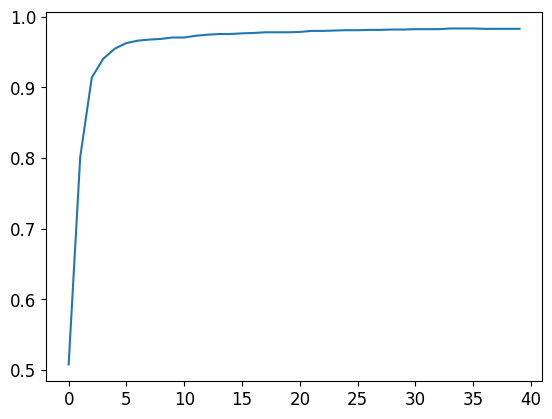

In [6]:
#YOUR TASK: Train a simple two-layer neural network (two perceptrons + hidden activation function) with built-in functions and an optimizer.

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()


learn = Learner(DataLoaders(dl, valid_dl), simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

plt.plot(L(learn.recorder.values).itemgot(2));